In [16]:
import matplotlib.pyplot as plt

In [23]:
# 드라이브별 정보
drives = [
    {
        "name": "E:", "total": 931,
        "used_parts": {
            "game": 300,
            "zip1": 50,
            "movie": 200,
            "zip2": 50,
            "voice": 100,
            "zip3": 20
        }
    },
    {
        "name": "H:", "total": 450,
        "used_parts": {
            "game": 120,
            "zip1": 30,
            "movie": 150,
            "zip2": 40,
            "voice": 50,
            "zip3": 10
        }
    },
    {
        "name": "I:", "total": 1800,
        "used_parts": {
            "game": 600,
            "zip1": 100,
            "movie": 450,
            "zip2": 120,
            "voice": 300,
            "zip3": 60
        }
    }
]

# 색상 정의
colors = {
    "game": "#ff6666",
    "movie": "#77aa99",
    "voice": "#66cc99",
    "zip1": "#cc99ff",
    "zip2": "#b266ff",
    "zip3": "#9966cc",
    "free": "#66b3ff"
}


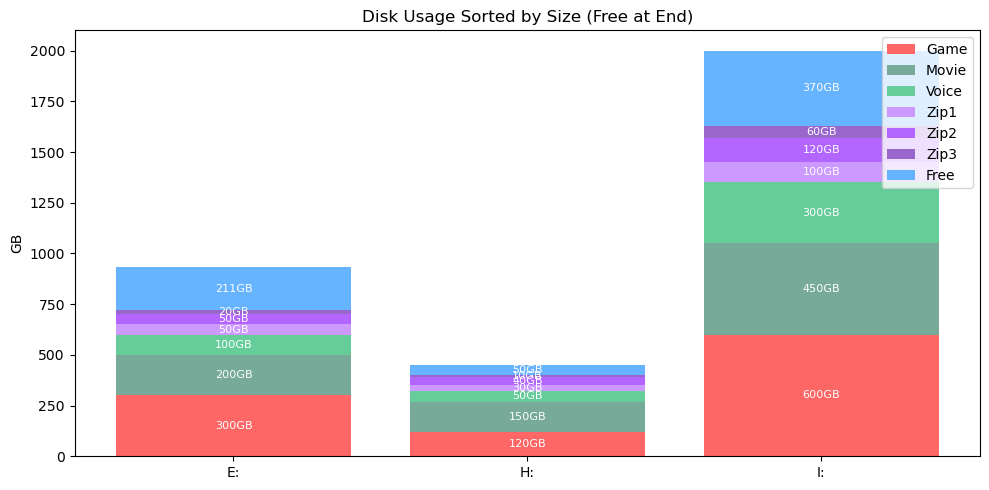

In [24]:
# 시각화 준비
labels = [d["name"] for d in drives]
totals = [d["total"] for d in drives]
fig, ax = plt.subplots(figsize=(10, 5))
bar_bottom = [0] * len(drives)

# 드라이브마다 용량 기준 정렬된 카테고리 추출
sorted_categories_per_drive = []
for d in drives:
    parts = d["used_parts"]
    sorted_parts = sorted(parts.items(), key=lambda x: x[1], reverse=True)
    sorted_categories_per_drive.append([k for k, v in sorted_parts])

# 모든 정렬된 항목에서 중복 없이 순서 유지된 전체 카테고리 목록 생성
seen = set()
sorted_all_categories = []
for cats in sorted_categories_per_drive:
    for cat in cats:
        if cat not in seen:
            seen.add(cat)
            sorted_all_categories.append(cat)

# free는 마지막에 추가
sorted_all_categories.append("free")

# 사용량 누적 저장
used_stacks = [0] * len(drives)

# 카테고리별로 그래프 생성
for cat in sorted_all_categories:
    values = []
    for i, d in enumerate(drives):
        if cat == "free":
            used = sum(d["used_parts"].values())
            values.append(d["total"] - used)
        else:
            values.append(d["used_parts"].get(cat, 0))
    ax.bar(labels, values, bottom=bar_bottom, label=cat.capitalize(), color=colors.get(cat, "gray"))
    bar_bottom = [bar_bottom[i] + values[i] for i in range(len(values))]

    # 텍스트 라벨 표시
    for i, v in enumerate(values):
        if v > 0:
            ax.text(i, bar_bottom[i] - v / 2, f'{v}GB', ha='center', va='center', color='white', fontsize=8)

# 차트 제목 및 범례
ax.set_ylabel("GB")
ax.set_title("Disk Usage Sorted by Size (Free at End)")
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()
